<a href="https://colab.research.google.com/github/gabriel-masson/Chika_2025.1/blob/main/XAI_teste_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[Kagle](https://www.kaggle.com/code/bennyfung/model-interpretability-xgboost-shap)


[Doc](https://shap.readthedocs.io/en/latest/example_notebooks/tabular_examples/tree_based_models/Basic%20SHAP%20Interaction%20Value%20Example%20in%20XGBoost.html)

In [ ]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb



from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler


from sklearn.model_selection import cross_val_score, LeaveOneOut, KFold

from imblearn.under_sampling import RandomUnderSampler

from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report

from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer, f1_score

import matplotlib.pyplot as plt
import seaborn as sns

import random

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_excel('/content/drive/MyDrive/_MESTRADO/REPLICK/Base de Dados/V2_BANCO_DOTLAB_347.xlsx')
df.head()

,PID,D0_Diagnóstico CHIKV,D0_Método diagnóstico,D0_Data de início dos sintomas,D0_Data de recrutamento,D0_Fase CHIKF (D0),D0_DPIS ambulat-D0,D0_Dias após inicio de sintomas (DPIS)- recrut,D0_Novo critério (0-3/4-10),D0_Critério anterior (0/1-10),...,D0_intensdor_dedomaod,D0_intensdor_quadrile,D0_intensdor_quadrild,D0_intensdor_joelhoe,D0_intensdor_joelhod,D0_intensdor_tornozeloe,D0_intensdor_tornozelod,D0_intensdor_dedopee,D0_intensdor_dedoped,D0_categoria_ativdoenca
0,REC001,Positivo,TR,2019-08-01,2019-09-09,Subagudo,28,39,1,1,...,4,1,1,3,3,4,4,3,2,3
1,REC002,Positivo,TR,2019-09-01,2019-09-16,Subagudo,10,15,1,1,...,4,4,4,4,4,4,4,1,1,2
2,REC004,Positivo,RT-qPCR (ZDC),2020-07-04,2020-07-08,Agudo,4,4,1,1,...,4,1,1,1,1,1,1,1,1,4
3,REC005,Positivo,TR,2020-05-26,2020-07-08,Subagudo,43,43,1,1,...,3,2,2,2,2,4,4,3,3,4
4,REC006,Positivo,TR,2020-06-19,2020-07-13,Subagudo,24,24,1,1,...,2,1,1,1,1,2,2,3,2,3


#Preparação dos dados

In [ ]:
features = [ 'D0_idade', 'D0_genero', 'D0_cor',

            'D0_febre_episodio1',         'D0_cefaleia_episodio1',          'D0_fadiga_episodio1',
             'D0_palidez_episodio1',     'D0_hiperemia_episodio1',          'D0_turvacao_episodio1',
             'D0_nausea_episodio1',      'D0_vomito_episodio1',             'D0_diarreia_episodio1',
             'D0_parestesia_episodio1',  'D0_disestesia_episodio1',         'D0_artralgia_episodio1',
             'D0_edema_episodio1',       'D0_mialgia_episodio1',            'D0_lombalgia_episodio1',
             'D0_prurido_episodio1',     'D0_rash_episodio1',               'D0_lesoes_episodio1',
             'D0_alopecia_episodio1',    'D0_alteracaomemoria_episodio1',   'D0_alteracaolibido_episodio1',
             'D0_enpp_fadiga',

             'D0_intensdor_ombroe',
             'D0_intensdor_ombrod',
             'D0_intensdor_punhoe',
             'D0_intensdor_punhod',
             'D0_intensdor_dedomaoe',
             'D0_intensdor_dedomaod',
             'D0_intensdor_joelhoe',
             'D0_intensdor_joelhod',
             'D0_intensdor_tornozeloe',
             'D0_intensdor_tornozelod',
             'D0_intensdor_dedopee',
             'D0_intensdor_dedoped',
             'D0_Novo critério (0-3/4-10)',
]

In [ ]:
df1 = df[features]
df1.shape

(347, 38)

In [ ]:
df1.columns = [col.replace('D0_', '').replace('_episodio1', '') for col in df1.columns]
df1.columns

Index(['idade', 'genero', 'cor', 'febre', 'cefaleia', 'fadiga', 'palidez',
       'hiperemia', 'turvacao', 'nausea', 'vomito', 'diarreia', 'parestesia',
       'disestesia', 'artralgia', 'edema', 'mialgia', 'lombalgia', 'prurido',
       'rash', 'lesoes', 'alopecia', 'alteracaomemoria', 'alteracaolibido',
       'enpp_fadiga', 'intensdor_ombroe', 'intensdor_ombrod',
       'intensdor_punhoe', 'intensdor_punhod', 'intensdor_dedomaoe',
       'intensdor_dedomaod', 'intensdor_joelhoe', 'intensdor_joelhod',
       'intensdor_tornozeloe', 'intensdor_tornozelod', 'intensdor_dedopee',
       'intensdor_dedoped', 'Novo critério (0-3/4-10)'],
      dtype='object')

In [ ]:
def avaliation_model(y_test,y_pred):
  metricas = pd.DataFrame(classification_report(y_test, y_pred, output_dict=True, zero_division=1)).round(4).T.drop('support', axis=1)
  metricas.drop(['macro avg', 'weighted avg'], axis=0, inplace=True)
  auc = roc_auc_score(y_test, y_pred)

  accuracy= (metricas.loc["accuracy", "f1-score"]*100).round(6)
  recall= (metricas.loc["1", "recall"]*100).round(6)
  especificity= (metricas.loc["0", "recall"]*100).round(6)
  precision= (metricas.loc["1", "precision"]*100).round(6)
  f1_score= (metricas.loc["1", "f1-score"]*100).round(6)
  AUC= (auc*100).round(2)
  print(f'Accuracy: {accuracy}')
  print(f'Recall: {recall}')
  print(f'Especificity: {especificity}')
  print(f'Precision: {precision}')
  print(f'F1_score: {f1_score}')
  print(f'AUC: {AUC}')

def cross_val_models_f1(df_train, model):
    X = df_train.drop('D0_Novo critério (0-3/4-10)', axis=1)
    y = df_train['D0_Novo critério (0-3/4-10)'].astype(int)

    kf = KFold(n_splits=10, shuffle=True, random_state=1)
    f1_scorer = make_scorer(f1_score, average='weighted')

    cross_model = cross_validate(model, X, y, cv=kf, scoring=f1_scorer)
    return cross_model['test_score']

def treino_teste(df_train, coluna_alvo, average, test_size=0.3, random_state=42):

    # Separar features e target
    X = df_train.drop(coluna_alvo, axis=1)
    y = df_train[coluna_alvo].astype(int)

    # Aplicar undersampling
    under_sampler = RandomUnderSampler(
        sampling_strategy={1: average},
        random_state=random_state
    )
    X_resampled, y_resampled = under_sampler.fit_resample(X, y)

    # Aplicar oversampling
    over_sampler = RandomOverSampler(
        sampling_strategy={0: average},
        random_state=random_state
    )
    X_resampled, y_resampled = over_sampler.fit_resample(X_resampled, y_resampled)

    # Dividir em treino e teste
    return train_test_split(
        X_resampled, y_resampled,
        test_size=test_size,
        random_state=random_state
    )

#XAI

##SHAP

In [ ]:
import shap

In [ ]:
df1.shape

(347, 38)

In [ ]:
X_train, X_test, y_train, y_test = treino_teste(df1, 'Novo critério (0-3/4-10)', 173)

X = df1.drop('Novo critério (0-3/4-10)', axis=1)
y = df1['Novo critério (0-3/4-10)'].astype(int)

# Aplicar undersampling
under_sampler = RandomUnderSampler(
  sampling_strategy={1: 173},
  random_state=42
)

X_resampled, y_resampled = under_sampler.fit_resample(X, y)

# Aplicar oversampling
over_sampler = RandomOverSampler(
  sampling_strategy={0: 173},
  random_state=42
)
X_resampled, y_resampled = over_sampler.fit_resample(X_resampled, y_resampled)

# Dividir em treino e teste
X_train, X_test, y_train, y_test =  train_test_split(
        X_resampled, y_resampled,
        test_size= 0.3,
        random_state=42
    )

In [ ]:
seed = 42

rf = RandomForestClassifier(
    criterion='gini',
    max_depth=1000,
    min_samples_leaf=0.01,
    min_samples_split=0.01,
    n_estimators=265,
    random_state=seed
)

xgb_model = xgb.XGBClassifier(
    colsample_bytree=0.2724291993,
    learning_rate=0.6750286131,
    max_depth=83,
    n_estimators=30,
    subsample=0.9953011896,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=seed
)


In [ ]:
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.2724291993, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='logloss', feature_types=None, feature_weights=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.6750286131,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=83, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=30, n_jobs=None,
              num_parallel_tree=None, ...)

In [ ]:
len(X_train.iloc[0])

37

In [ ]:
y_pred = xgb_model.predict(X_test)
print(xgb_model.__class__.__name__)
avaliation_model(y_test, y_pred)

XGBClassifier
Accuracy: 75.96
Recall: 71.7
Especificity: 80.39
Precision: 79.17
F1_score: 75.25
AUC: 76.05


In [ ]:
#Exportar modelos
from joblib import dump, load
dump(xgb_model, "xgb.joblib")

['xgb.joblib']

In [ ]:
inp = []
# Select the first row of df1, excluding the target column
input_x = df1.iloc[0].drop('Novo critério (0-3/4-10)')

In [ ]:
len(inp)

0

In [ ]:
xgb_deploy = load('xgb.joblib')
# Reshape the input data to be a 2D array as expected by predict
y_pred_novo = xgb_deploy.predict_proba(input_x.values.reshape(1, -1))
print(y_pred_novo)

[[0.0183627 0.9816373]]


###Global importance

In [ ]:
explainer = shap.Explainer(xgb_model, X_test)
shap_values = explainer(X_test)

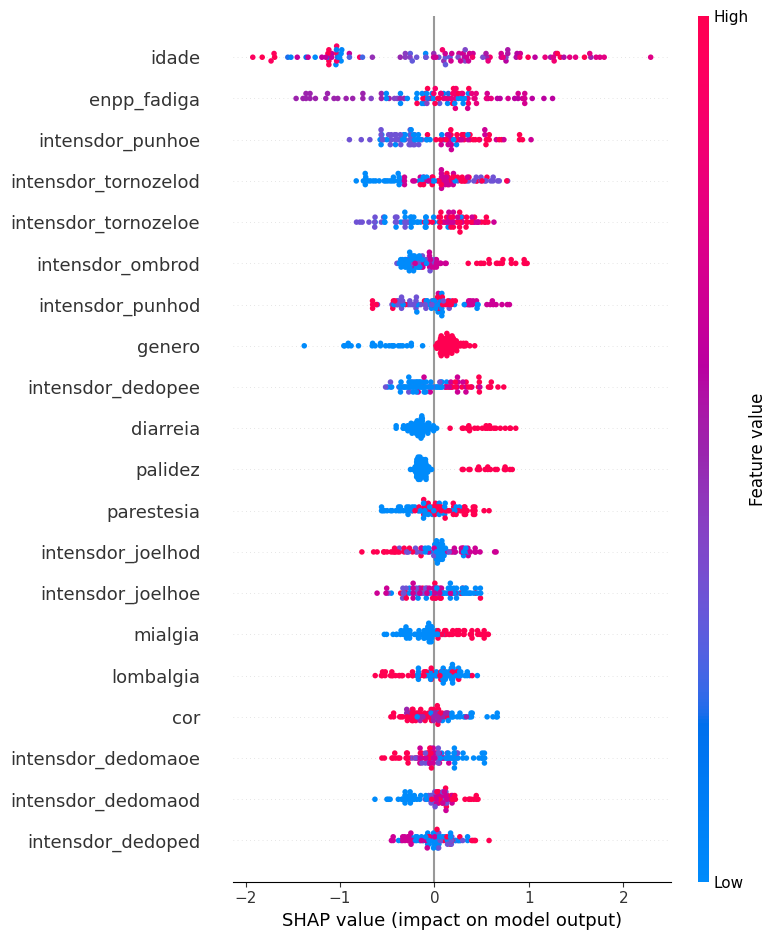

In [ ]:
shap.summary_plot(shap_values, X_test,)

Quanto maior a cauda para a direita maior será a inflência positiva para predição, para esquerda, influência de forma negativa.

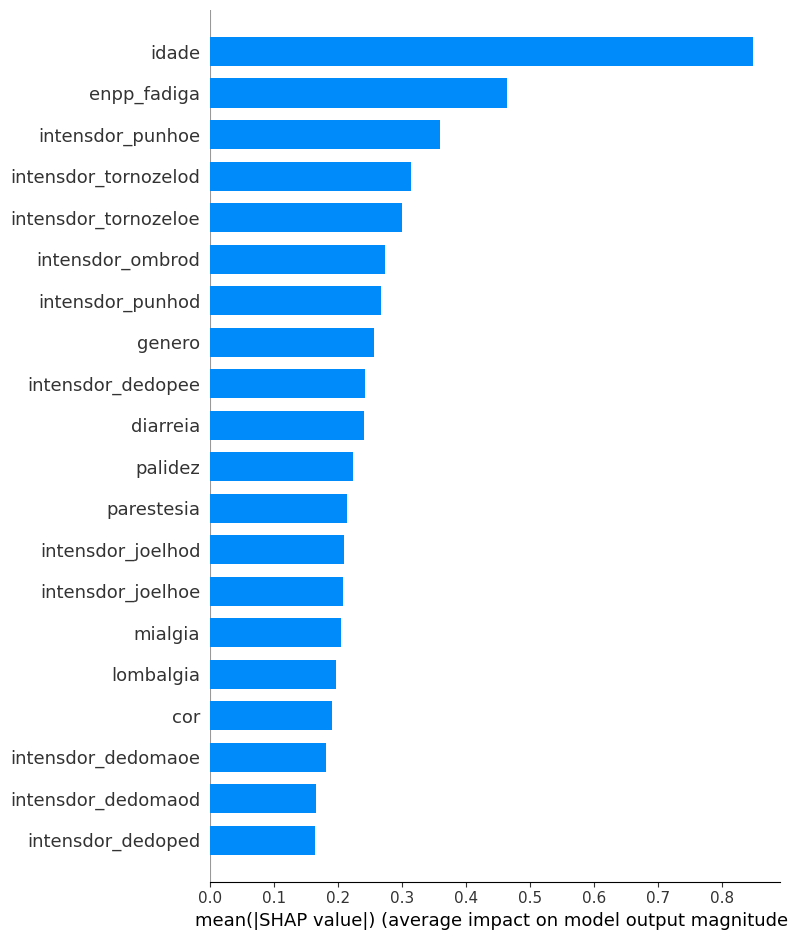

In [ ]:
shap.summary_plot(shap_values, X_test, plot_type="bar")

###Local importance

In [ ]:
# The SHAP library provides TreeExplaier for all tree-based algorithms, like LGBM and XGBoost
explainer = shap.TreeExplainer(xgb_model)

# Output the shap values of individual instances in a array format
shap_values = explainer.shap_values(X)

In [ ]:
df_shap = pd.DataFrame(shap_values, columns=X_test.columns)
df_shap.head(5)

,idade,genero,cor,febre,cefaleia,fadiga,palidez,hiperemia,turvacao,nausea,...,intensdor_punhoe,intensdor_punhod,intensdor_dedomaoe,intensdor_dedomaod,intensdor_joelhoe,intensdor_joelhod,intensdor_tornozeloe,intensdor_tornozelod,intensdor_dedopee,intensdor_dedoped
0,-0.582774,0.117463,0.122484,0.017148,-0.198089,0.177838,-0.112383,0.054611,-0.048636,-0.017324,...,0.431013,0.525986,-0.106304,-0.000595,-0.076373,0.313391,0.436112,0.189366,0.204878,0.477215
1,0.769576,0.105791,0.239406,-0.035591,-0.114680,-0.188793,-0.076018,0.081575,-0.011555,-0.001849,...,0.063439,0.493761,-0.155324,0.274593,0.122135,-0.139988,0.302093,0.133719,0.107882,0.215884
2,0.771531,0.430221,-0.176887,-0.083053,-0.317243,0.184289,-0.083062,-0.121851,-0.055310,0.012674,...,0.971804,0.002026,-0.026684,0.240690,0.167139,0.302126,0.158766,-0.271956,-0.070334,0.061729
3,-0.611565,0.203483,-0.272928,-0.044275,0.071953,0.152200,-0.092546,0.031250,-0.130535,-0.006380,...,0.514836,-0.573204,-0.271464,0.019982,-0.436902,-0.337630,-0.055117,0.104573,-0.112967,-0.392894
4,-0.745395,0.615755,0.093532,0.010364,-0.077445,0.133071,-0.080557,0.019969,-0.100309,-0.019128,...,-0.519599,-0.607291,0.175727,0.079852,0.299143,0.111773,-0.448660,0.717766,0.511373,0.498393


In [ ]:
y_pred = xgb_model.predict(X)

df_pred = pd.DataFrame(y_pred, columns=['pred'])
df_pred.head(5)

,pred
0,1
1,1
2,1
3,0
4,1


In [ ]:
print('Pred size : {}, Shap size : {}'.format(df_pred.shape, df_shap.shape))

Pred size : (347, 1), Shap size : (347, 37)


In [ ]:
df_pred_shap = pd.concat([df_pred,df_shap], axis=1)

df_pred_shap.head(5)

,pred,idade,genero,cor,febre,cefaleia,fadiga,palidez,hiperemia,turvacao,...,intensdor_punhoe,intensdor_punhod,intensdor_dedomaoe,intensdor_dedomaod,intensdor_joelhoe,intensdor_joelhod,intensdor_tornozeloe,intensdor_tornozelod,intensdor_dedopee,intensdor_dedoped
0,1,-0.582774,0.117463,0.122484,0.017148,-0.198089,0.177838,-0.112383,0.054611,-0.048636,...,0.431013,0.525986,-0.106304,-0.000595,-0.076373,0.313391,0.436112,0.189366,0.204878,0.477215
1,1,0.769576,0.105791,0.239406,-0.035591,-0.114680,-0.188793,-0.076018,0.081575,-0.011555,...,0.063439,0.493761,-0.155324,0.274593,0.122135,-0.139988,0.302093,0.133719,0.107882,0.215884
2,1,0.771531,0.430221,-0.176887,-0.083053,-0.317243,0.184289,-0.083062,-0.121851,-0.055310,...,0.971804,0.002026,-0.026684,0.240690,0.167139,0.302126,0.158766,-0.271956,-0.070334,0.061729
3,0,-0.611565,0.203483,-0.272928,-0.044275,0.071953,0.152200,-0.092546,0.031250,-0.130535,...,0.514836,-0.573204,-0.271464,0.019982,-0.436902,-0.337630,-0.055117,0.104573,-0.112967,-0.392894
4,1,-0.745395,0.615755,0.093532,0.010364,-0.077445,0.133071,-0.080557,0.019969,-0.100309,...,-0.519599,-0.607291,0.175727,0.079852,0.299143,0.111773,-0.448660,0.717766,0.511373,0.498393


In [ ]:
df_pred_shap.head(10)

,pred,idade,genero,cor,febre,cefaleia,fadiga,palidez,hiperemia,turvacao,...,intensdor_punhoe,intensdor_punhod,intensdor_dedomaoe,intensdor_dedomaod,intensdor_joelhoe,intensdor_joelhod,intensdor_tornozeloe,intensdor_tornozelod,intensdor_dedopee,intensdor_dedoped
0,1,-0.582774,0.117463,0.122484,0.017148,-0.198089,0.177838,-0.112383,0.054611,-0.048636,...,0.431013,0.525986,-0.106304,-0.000595,-0.076373,0.313391,0.436112,0.189366,0.204878,0.477215
1,1,0.769576,0.105791,0.239406,-0.035591,-0.114680,-0.188793,-0.076018,0.081575,-0.011555,...,0.063439,0.493761,-0.155324,0.274593,0.122135,-0.139988,0.302093,0.133719,0.107882,0.215884
2,1,0.771531,0.430221,-0.176887,-0.083053,-0.317243,0.184289,-0.083062,-0.121851,-0.055310,...,0.971804,0.002026,-0.026684,0.240690,0.167139,0.302126,0.158766,-0.271956,-0.070334,0.061729
3,0,-0.611565,0.203483,-0.272928,-0.044275,0.071953,0.152200,-0.092546,0.031250,-0.130535,...,0.514836,-0.573204,-0.271464,0.019982,-0.436902,-0.337630,-0.055117,0.104573,-0.112967,-0.392894
4,1,-0.745395,0.615755,0.093532,0.010364,-0.077445,0.133071,-0.080557,0.019969,-0.100309,...,-0.519599,-0.607291,0.175727,0.079852,0.299143,0.111773,-0.448660,0.717766,0.511373,0.498393
5,0,0.095420,-0.603767,-0.221958,-0.052626,-0.283799,-0.227764,-0.107790,0.016149,0.002173,...,-0.186829,-0.016328,-0.251521,-0.004564,0.151221,-0.013635,-0.301073,-0.653649,-0.154822,-0.163634
6,1,0.211386,0.355855,0.497360,0.014375,0.049821,0.039976,-0.065491,0.045741,-0.082208,...,0.150153,0.166838,0.302619,0.104831,-0.061861,0.233147,-0.373696,0.545295,-0.199352,0.432615
7,1,1.164907,0.678718,0.363106,-0.053119,-0.081736,-0.257710,-0.062982,0.018823,-0.078957,...,0.143931,0.441793,0.121975,0.128279,-0.034130,0.098618,0.084647,-0.197886,0.464582,-0.304695
8,0,-1.103066,-0.880593,0.534758,-0.041011,-0.075197,-0.137174,-0.110531,0.017011,-0.032828,...,-0.250430,-0.482799,-0.000381,0.055560,-0.260321,0.271839,-0.228786,-0.316726,-0.509331,0.272121
9,0,-0.992857,0.325919,-0.297063,-0.027525,0.061131,-0.022356,-0.057424,0.054738,-0.090149,...,-0.598286,-0.381782,-0.094195,0.021920,-0.463654,-0.765831,-0.625516,0.530272,-0.378406,-0.288804


In [ ]:
# set the true and false prediction into two differnt dataframes
df_pred_shap_1 = df_pred_shap[df_pred_shap['pred'] == 1].reset_index()
df_pred_shap_0 = df_pred_shap[df_pred_shap['pred'] == 0].reset_index()

print('True : {}, False :{}'.format(df_pred_shap_1.shape, df_pred_shap_0.shape))

True : (219, 39), False :(128, 39)


In [ ]:
# randomly select an index from a dataframe
def random_index_selection(dataframe):
    index_list = dataframe.index.tolist()
    random_index = random.choice(index_list)
    return random_index

In [ ]:
# randomly select 4 rows
idx = [None] * 4

for i in [0,1,2,3]:
    idx[i] = random_index_selection(df_pred_shap_1)

Devemos analisar os Verdadeiros positivos para ter uma analise mais precisa?

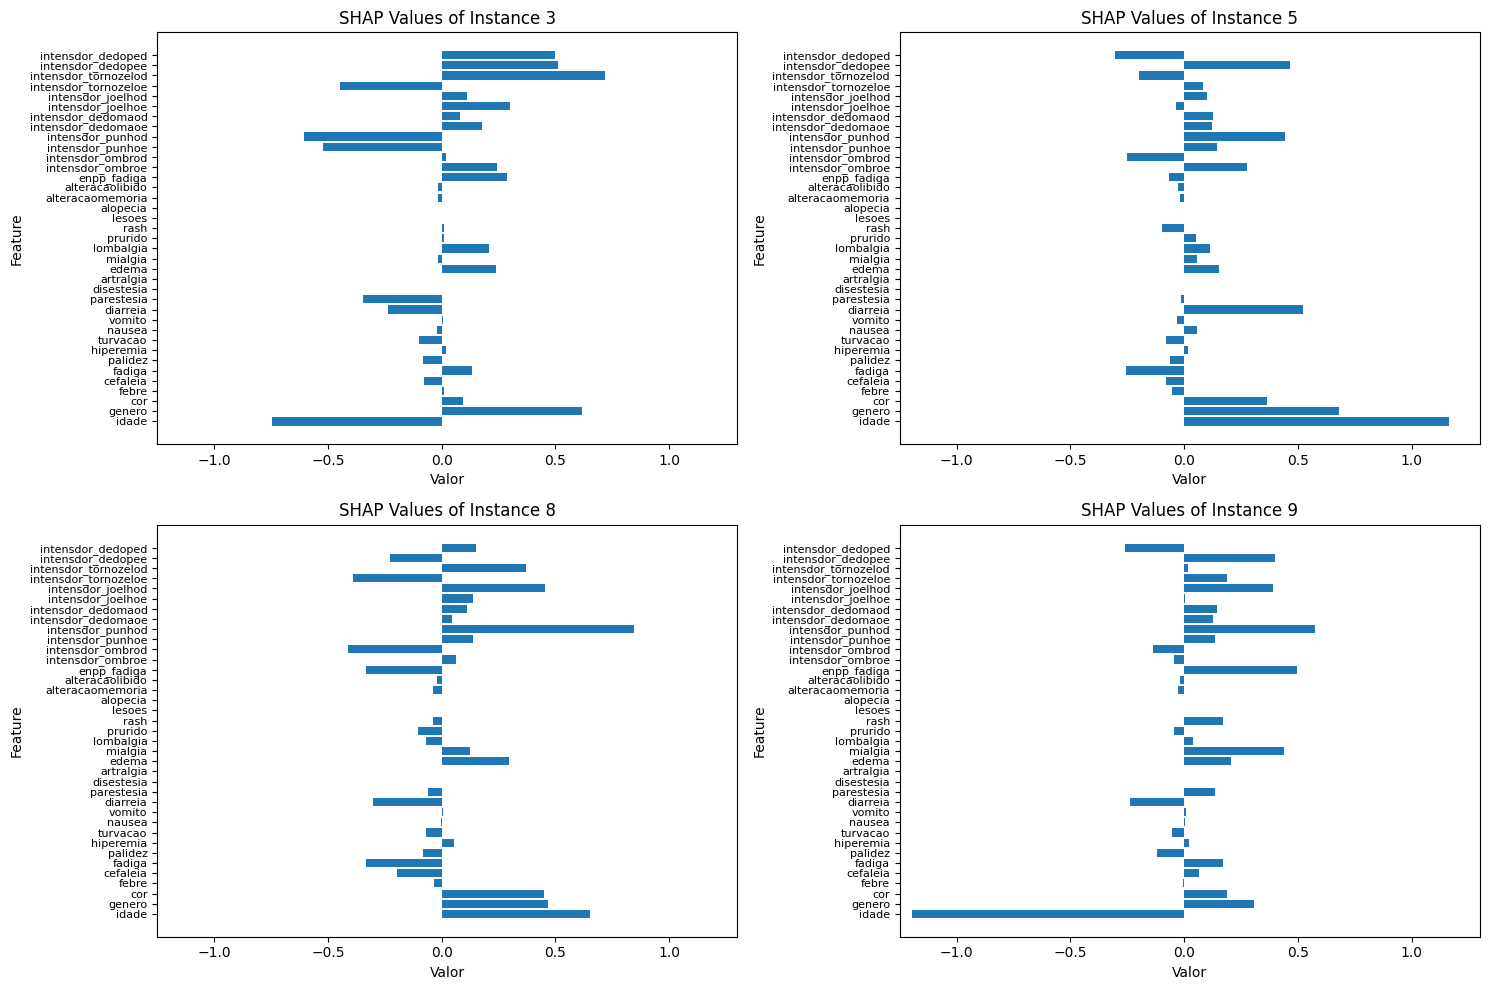

In [ ]:
instances = df_pred_shap_1.drop(['pred', 'index'], axis=1)

# Cria subplots
fig, ax = plt.subplots(2, 2, figsize=(15, 10))

# Gráficos de barras horizontais
ax[0, 0].barh(instances.columns.tolist(), instances.iloc[idx[0], :].values.tolist())
ax[0, 1].barh(instances.columns.tolist(), instances.iloc[idx[1], :].values.tolist())
ax[1, 0].barh(instances.columns.tolist(), instances.iloc[idx[2], :].values.tolist())
ax[1, 1].barh(instances.columns.tolist(), instances.iloc[idx[3], :].values.tolist())

# Títulos para cada subplot
ax[0, 0].set_title(f'SHAP Values of Instance {idx[0]}')
ax[0, 1].set_title(f'SHAP Values of Instance {idx[1]}')
ax[1, 0].set_title(f'SHAP Values of Instance {idx[2]}')
ax[1, 1].set_title(f'SHAP Values of Instance {idx[3]}')


# Rótulos dos eixos
for a in ax.flat:
    a.set_xlim(-1.25, 1.30)
    a.set_xlabel('Valor')
    a.set_ylabel('Feature')
    a.tick_params(axis='y', labelsize=8)

plt.tight_layout()
plt.show()


Temos features repetidas: enpp fadiga e fadiga

Features como:

1.	Alteração memoria
2.	alteração libido  
3.	Alopecia  
4.	lesões  
5.	prurido
6.	artralgia
7.	disenteria
8.	vomito
9.	náusea
10.	turvação
11.	hiperemia
12.	febre  
13. Lombagia

colab com o teste sem esses atributos [colab](https://colab.research.google.com/drive/1EsUEMtCK_TpkpaVNTIY2Tt29qX2B8Fux?usp=sharing)